

## DESIGN OF AN IMAGE FILTER FUNCTION, PARALLELIZABLE AND SCALABLE

Implementation of a filter image process using parallelization:

In [1]:
import numpy as np
import multiprocessing as mp
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cProfile

from multiprocessing.sharedctypes import Value, Array, RawArray
from multiprocessing import Process, Lock
import ctypes
import importlib

In [2]:
F_IMAGE1= "chess.jpg" #<DEFINE HERE WHICH IMAGE YOU WANTS TO LOAD
F_IMAGE2= "digits.jpg" #<DEFINE HERE WHICH IMAGE YOU WANTS TO LOAD

In [3]:
# Define the images
image1= np.array(Image.open(F_IMAGE1))
image2= np.array(Image.open(F_IMAGE2))

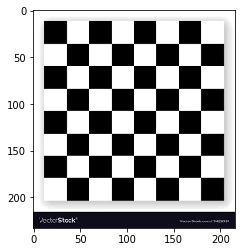

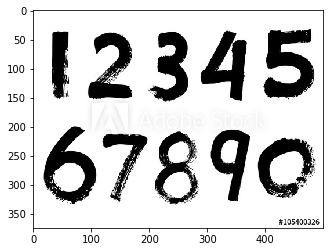

In [4]:
# Observe the images selected
plt.figure()
plt.imshow(image1)
plt.show()

plt.figure()
plt.imshow(image2)
plt.show()

* The first filter is impulse response filter (the image output must be equals to the original one).
* The second filter is an edge filter, first order in x axis,  
* The third filter is an edge filter, first order in y axis,
* the fourth filter is an edge filter, second order, bi-directional
* the fifth filter is a blur gausian filter.

In [5]:
## Filter masks

filter1=np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])# 5x5

filter2=np.array([0.5, 0 , -0.5]) #1x5
filter3=np.array([[0.5],[0],[-0.5]]) #5x1

filter4=np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])# 3x3
filter5=np.array([
    [0.00078633,0.00655965,0.01330373,0.00655965,0.00078633],
    [0.00655965,0.05472157,0.11098164,0.05472157,0.00655965],
    [0.01330373,0.11098164,0.22508352,0.11098164,0.01330373],
    [0.00655965,0.05472157,0.11098164,0.05472157,0.00655965],
    [0.00078633,0.00655965,0.01330373,0.00655965,0.00078633]
]) #5x5

In [6]:
#Stores in the variable the number of processes in the CPU
NUMPROCESS=mp.cpu_count()

In [7]:
## NEED TO SELECT HERE THE IMAGE THAT IS GOING TO BE FILTERED
image = image1 #SELECT THE IMAGE SELECTED
data_buffer_size=int(np.product(image.size))

In [8]:
filtered_image1_VECTOR = Array(ctypes.c_byte,data_buffer_size) 
filtered_image2_VECTOR = Array(ctypes.c_byte,data_buffer_size) 

In [9]:
def tonumpyarray(mp_arr):
    #mp_array is a shared memory array with lock
    
    return np.frombuffer(mp_arr.get_obj(),dtype=np.uint8)


Applying the filters to the image:


In [10]:
import filter_exec as my
# imports the module with the filteres_execution function

In [11]:
#executes the mutltiprocessing function of two parallal processings

# It receives the image that is going to be filtered
# The first filter mask
# The second filter mask
# The number of processes
# The shared memory Array where is going to be stored the first filtered image
# The shared memory Array where is going to be stored the second filtered image

my.filters_execution(image, filter2, filter3, NUMPROCESS, filtered_image1_VECTOR, filtered_image2_VECTOR)

# Visualization
In this last cells we take the filtered images stored in the multiprocessing.Vector variables filtered_image1_VECTOR and filtered_image2_VECTOR, converts to numpy array, with the same shape of the orginal images, and show the results.

In [12]:
# Because of the shared memory space being in the global variables, 
# we can retrieve the shared memory Array directly

filtered_image1=tonumpyarray(filtered_image1_VECTOR).reshape(image.shape)
filtered_image2=tonumpyarray(filtered_image2_VECTOR).reshape(image.shape)

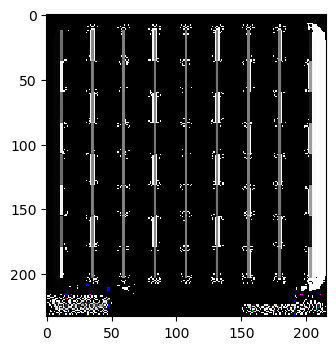

In [13]:
plt.figure(dpi = 100)
plt.imshow(filtered_image1)

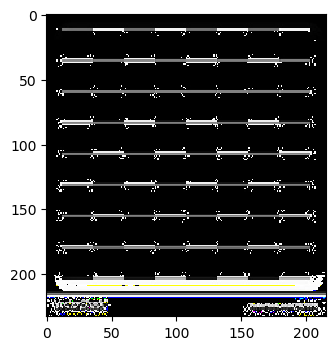

In [14]:
plt.figure(dpi = 100)
plt.imshow(filtered_image2)